In [ ]:
pip install samscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-006prko_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-006prko_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done


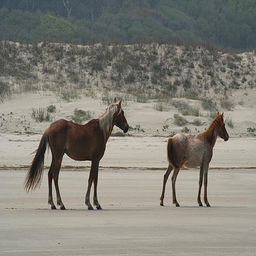

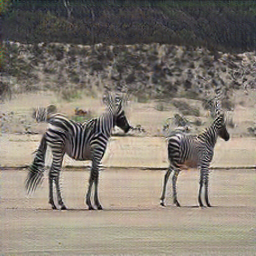

In [ ]:
import requests
import os
from IPython.display import Image, display



def download_image(url, save_path):
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception if the request was unsuccessful

    with open(save_path, 'wb') as file:
        file.write(response.content)
os.makedirs('imgs', exist_ok=True)
# Example usage
image_url = 'https://i.ibb.co/yFFg5pn/n02381460-20-real.png'
save_location = 'imgs/real.png'
download_image(image_url, save_location)
display(Image(filename=save_location))

image_url = 'https://i.ibb.co/GCQ2jQy/n02381460-20-fake.png'
save_location = 'imgs/fake.png'
download_image(image_url, save_location)
display(Image(filename=save_location))



In [ ]:
import argparse
import samscore


## Initializing the model
SAMScore_Evaluation = samscore.SAMScore(model_type = "vit_b" )
samscore_result = SAMScore_Evaluation.evaluation_from_path(source_image_path='imgs/real.png',  generated_image_path='imgs/fake.png')

print('SAMScore: %.4f'%samscore_result)


File downloaded successfully.
SAMScore: 0.9260


In [11]:
import samscore
import cv2
import torch

SAMScore_Evaluation = samscore.SAMScore(model_type = "vit_b" )

source_cv2 = cv2.imread('imgs/real.png')
source = torch.from_numpy(source_cv2.transpose(2, 0, 1)).unsqueeze(0).float()
source = torch.cat((source,source,source),dim=0)

generated_cv2 = cv2.imread('imgs/fake.png')
generated = torch.from_numpy(generated_cv2.transpose(2, 0, 1)).unsqueeze(0).float()
generated = torch.cat((generated,generated,generated),dim=0)

samscore_result = SAMScore_Evaluation.evaluation_from_torch(source,  generated)

print('SAMScore:',samscore_result)

SAMScore: tensor([0.9265, 0.9265, 0.9265])
